In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import scipy
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
## Data Collection and Processing
# loading the dataset to pandas DataFrame
loan_data = pd.read_csv('loanpred.csv')

In [3]:
# printing the first 5 rows of the dataframe
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
loan_data.shape

(614, 13)

In [5]:
# statistical measures
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# number of missing values in each column
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
# Credit history of applicants

count1 = len(loan_data[loan_data.Credit_History == 1])
count0 = len(loan_data[loan_data.Credit_History == 0])
countNull = len(loan_data[loan_data.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(loan_data.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(loan_data.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [10]:
# Percentage of the highest Gender applying for a Loan

countMale = len(loan_data[loan_data.Gender == 'Male'])
countFemale = len(loan_data[loan_data.Gender == 'Female'])
countNull = len(loan_data[loan_data.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(loan_data.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(loan_data.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [11]:
# Percentage of Loan Status

countY = len(loan_data[loan_data.Loan_Status == 'Y'])
countN = len(loan_data[loan_data.Loan_Status == 'N'])
countNull = len(loan_data[loan_data.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(loan_data.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(loan_data.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [12]:
# Educational qualification of loan applicants

loan_data.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
# Number of Married or Single person applying

loan_data.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [14]:
# Mode of emplyment of applicants

loan_data.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [15]:
# Total Number of each Gender applying

loan_data.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

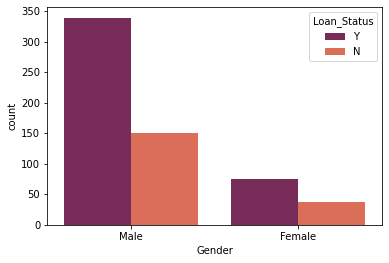

In [16]:
# Visual of Marital status & Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data, palette="rocket")

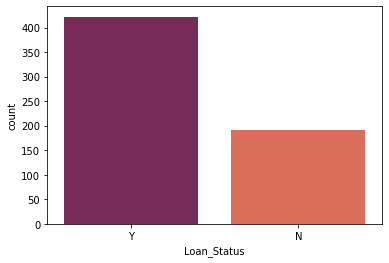

In [17]:
# Visual representation of loan status

sns.countplot(x="Loan_Status", data=loan_data, palette="rocket")
plt.show()

In [18]:
# Dropping and replacing Missing values

loan_data = loan_data.drop(['Loan_ID'], axis = 1)

In [19]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0],inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [20]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(),inplace=True)

In [21]:
# Transforming categorical variables

loan_data = pd.get_dummies(loan_data)

# Drop columns
loan_data = loan_data.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
loan_data.rename(columns=new, inplace=True)

In [22]:
# Removing outliers 

Q1 = loan_data.quantile(0.25)
Q3 = loan_data.quantile(0.75)
IQR = Q3 - Q1

loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
# Square Root Transformation to normalized the distribution

loan_data.ApplicantIncome = np.sqrt(loan_data.ApplicantIncome)
loan_data.CoapplicantIncome = np.sqrt(loan_data.CoapplicantIncome)
loan_data.LoanAmount = np.sqrt(loan_data.LoanAmount)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

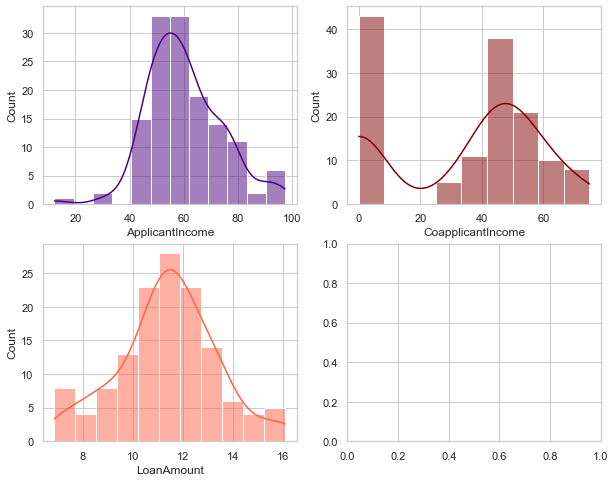

In [24]:
# Visualizing the distribution

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='indigo')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='maroon')
sns.histplot(data=loan_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='tomato')

In [25]:
# Dependent features will be seperated from independent features

X = loan_data.drop(["Loan_Status"], axis=1)
y = loan_data["Loan_Status"]

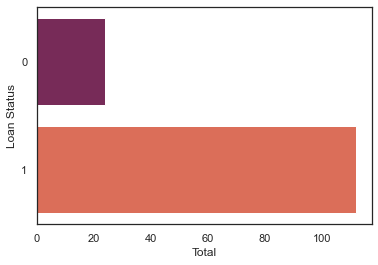

In [26]:
sns.set_theme(style="white")
sns.countplot(y=y, data=loan_data, palette="rocket")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [27]:
# Data Normalization

X = MinMaxScaler().fit_transform(X)

In [28]:
# Splitting dataset Into 80% train and 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

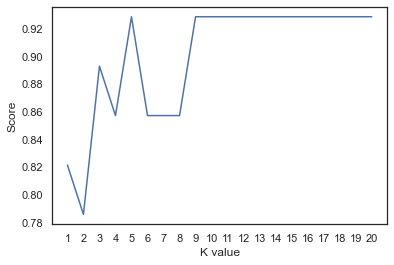

KNN best accuracy: 92.86%


In [29]:
# Using KNeighbors Classifier Model for prediction

scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

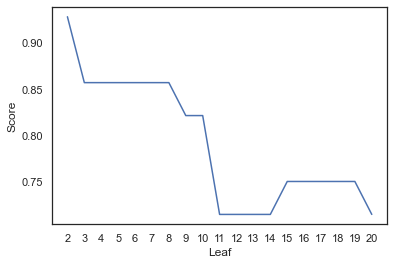

Decision Tree Accuracy: 92.86%


In [30]:
# Using Decision Tree Model for prediction

scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

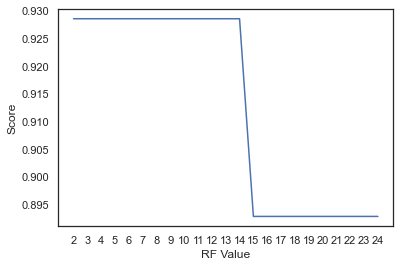

Random Forest Accuracy:  92.86%


In [31]:
# Using Random Forest Model for prediction

scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [32]:
compare = pd.DataFrame({'Model': ['K Neighbors', 
                                   'Decision Tree', 
                                  'Random Forest'], 
                        'Accuracy': [KNAcc*100,
                                     DTAcc*100, 
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,K Neighbors,92.857143
1,Decision Tree,92.857143
2,Random Forest,92.857143
